In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
df = pd.read_csv("zomato_dataset.csv")

# sanity check for the dataset

In [57]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


This dataset provides a comprehensive view of the restaurant scene in the 13 metropolitan areas of India( 900 restaurants) . Researchers, analysts, and food enthusiasts can use this dataset to gain insights into various aspects such as dining and delivery ratings, customer reviews and preferences, popular cuisines, best-selling items, and pricing information across different cities. It enables the exploration of dining patterns, the comparison of restaurants and cuisines between cities, and the identification of trends in the food industry. This dataset serves as a valuable resource for understanding the culinary landscape and making data-driven decisions related to the restaurant business, customer satisfaction, and food choices in these metropolitan areas of India.
In this dataset, we have more than 127000 rows and 12 columns, a fairly large dataset.

The columns in the dataset are as follows:

1. Restaurant Name: The name of the restaurant.

2. Dining Rating: The rating given by customers for the dining experience at the restaurant.

3. Delivery Rating: The rating given by customers for the delivery service provided by the restaurant.

4. Dining Votes: The number of votes or reviews received for the dining experience.

5. Delivery Votes: The number of votes or reviews received for the delivery service.

6. Cuisine: The type of cuisine or culinary style offered by the restaurant.

7. Place:
8. City Name: The name of the metropolitan area or city where the restaurant is located.
The dataset includes the following cities: Hyderabad, Kolkata, Lucknow, Pune, Chennai, Bengaluru, Mumbai, Raipur, Jaipur, 
Ahmedabad, Kochi, Goa, and New Delhi.
    
9. Item Name: The name of a specific dish or item offered by the restaurant.
    
10.Best Seller: Indicates whether the item is a best-selling dish or not.
    
11.Votes: The number of votes or reviews received for the specific item.

12.prices: The prices associated with each item offered by the restaurant.

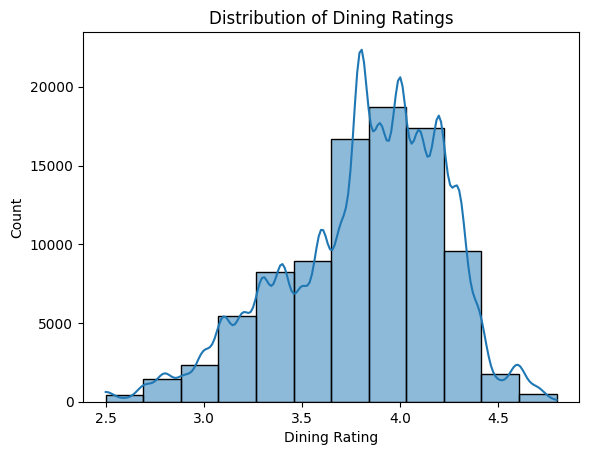

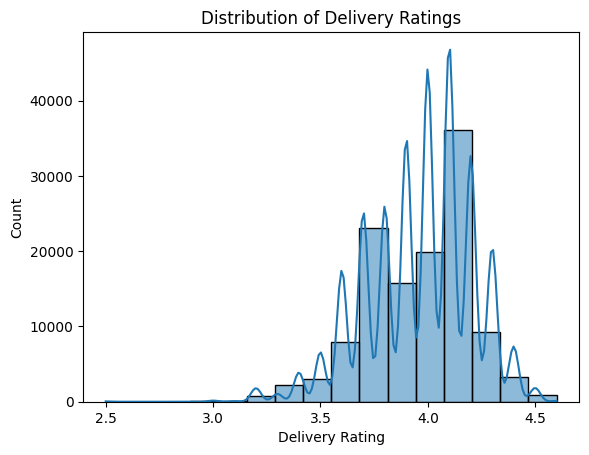

In [49]:
sns.histplot(df['Dining Rating'], bins=12, kde=True)
plt.title('Distribution of Dining Ratings')
plt.show()

sns.histplot(df['Delivery Rating'], bins=16, kde=True)
plt.title('Distribution of Delivery Ratings')
plt.show()

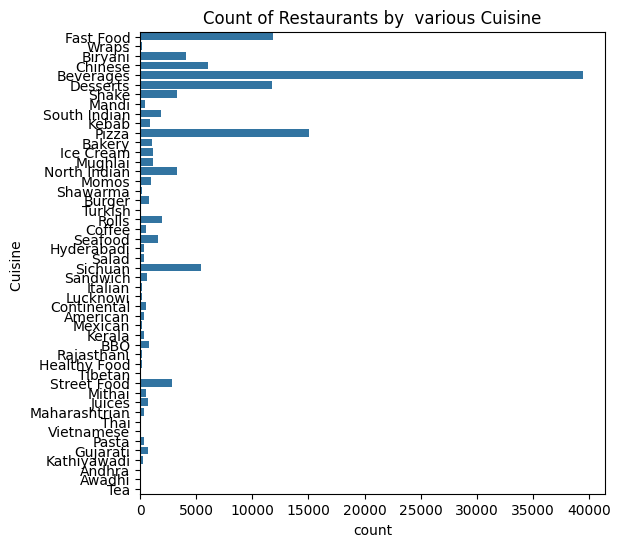

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, y='Cuisine ')
plt.title('Count of Restaurants by  various Cuisine')
plt.show()

In above countplot we can easily know that which restruanrant sells which cuisine

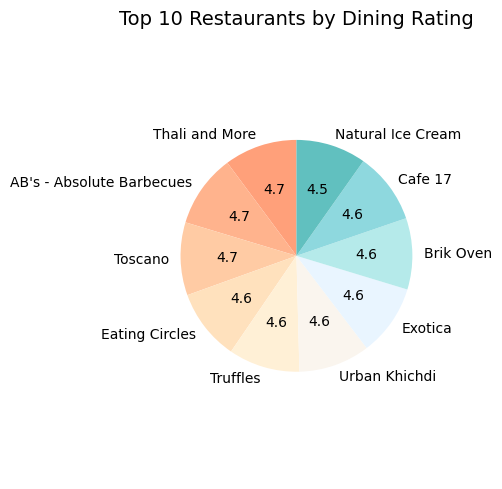

In [63]:
restaurant_ratings = df.groupby('Restaurant Name')['Dining Rating'].mean().reset_index()
sorted_df = restaurant_ratings.sort_values('Dining Rating', ascending=False)
top_10_restaurants = sorted_df.head(10)
restaurant_names = top_10_restaurants['Restaurant Name']
dining_ratings = top_10_restaurants['Dining Rating']
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFF0D6', '#FAF5EE', '#E9F5FF', '#B5EAEA', '#8ED8DE', '#61C0BF']
plt.figure(figsize=(5,5))
_, _, autotexts = plt.pie(dining_ratings, labels=restaurant_names, colors=colors, startangle=90,
                          autopct='', textprops={'fontsize': 10})
for i, dining_rating in enumerate(dining_ratings):
    autotexts[i].set_text(f'{dining_rating:.1f}')
plt.title('Top 10 Restaurants by Dining Rating', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

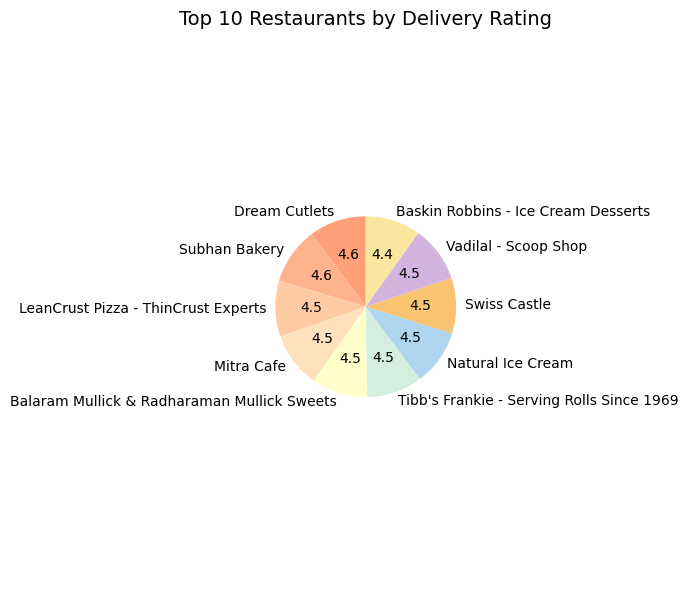

In [70]:
restaurant_ratings = df.groupby('Restaurant Name')['Delivery Rating'].mean().reset_index()
sorted_df = restaurant_ratings.sort_values('Delivery Rating', ascending=False)
top_10_restaurants = sorted_df.head(10)
restaurant_names = top_10_restaurants['Restaurant Name']
dining_ratings = top_10_restaurants['Delivery Rating']
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']
plt.figure(figsize=(6,6))
_, _, autotexts = plt.pie(dining_ratings, labels=restaurant_names, colors=colors, startangle=90,
                          autopct='', textprops={'fontsize': 10})
for i, dining_rating in enumerate(dining_ratings):
    autotexts[i].set_text(f'{dining_rating:.1f}')
plt.title('Top 10 Restaurants by Delivery Rating', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

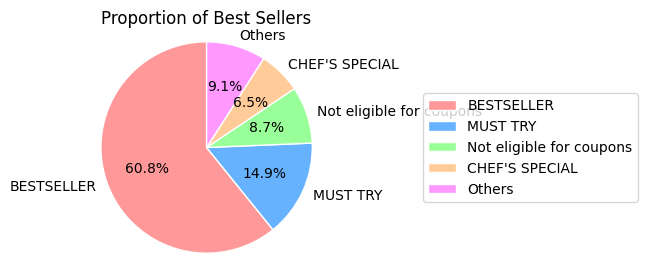

In [68]:
counts = df['Best Seller'].value_counts()
proportions = counts / counts.sum()
threshold = 0.05
small_proportions = proportions[proportions < threshold]
proportions['Others'] = small_proportions.sum()
proportions = proportions[proportions >= threshold]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF', '#FFFF99',
          '#99FFFF', '#FFCCCC', '#CCCCFF', '#99CC99', '#CC99CC', '#FFCCFF']
plt.figure(figsize=(3,3))
plt.pie(proportions, labels=proportions.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.axis('equal')
plt.title('Proportion of Best Sellers')
plt.legend(loc='center left', bbox_to_anchor=(1.4, 0.5))
plt.show()

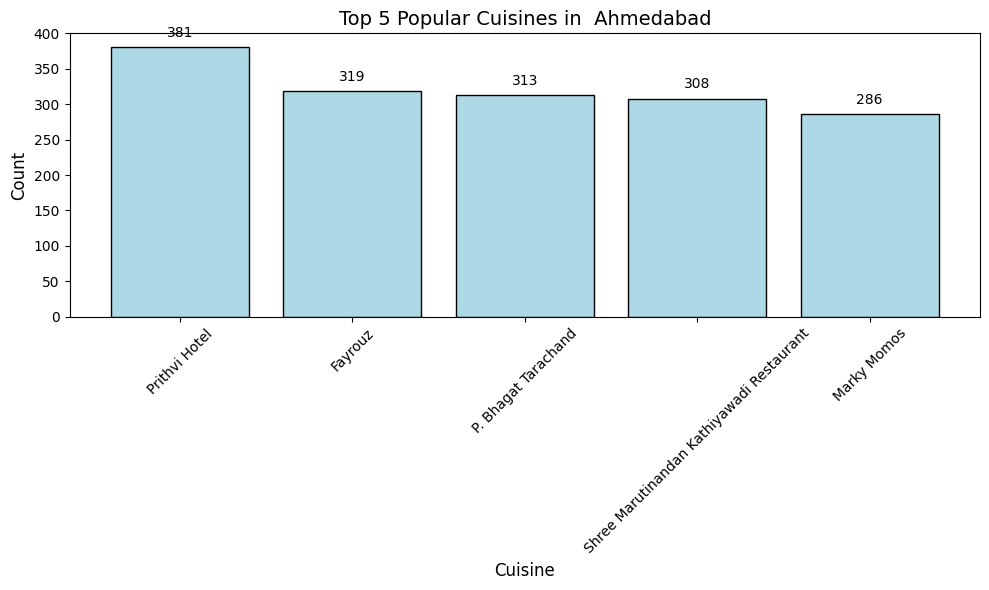

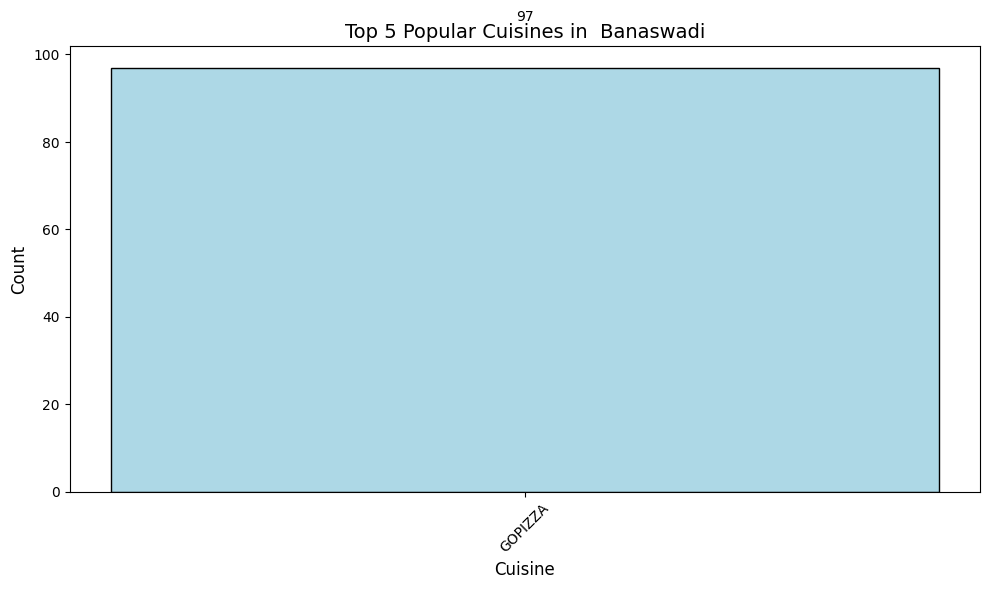

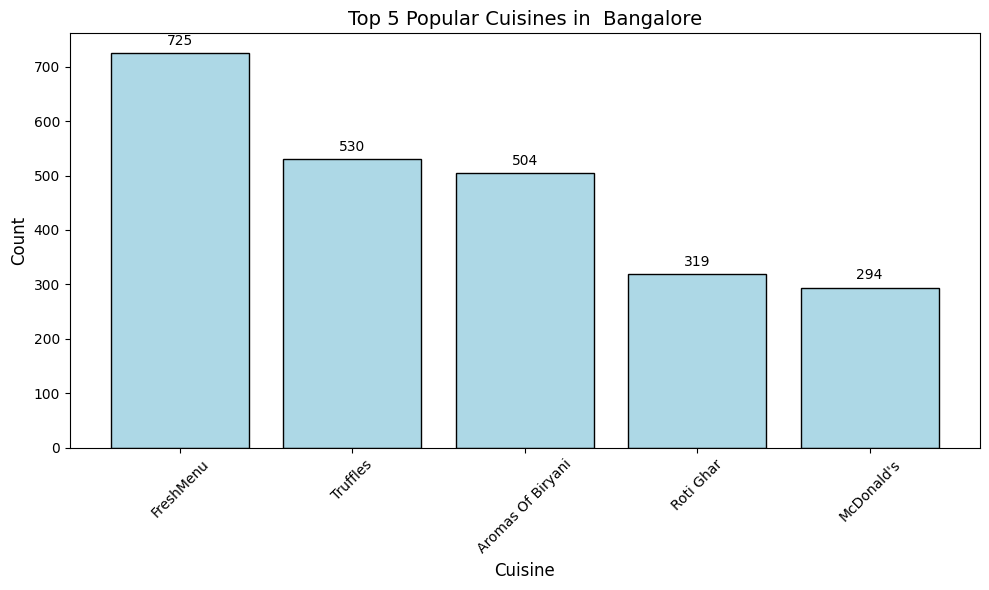

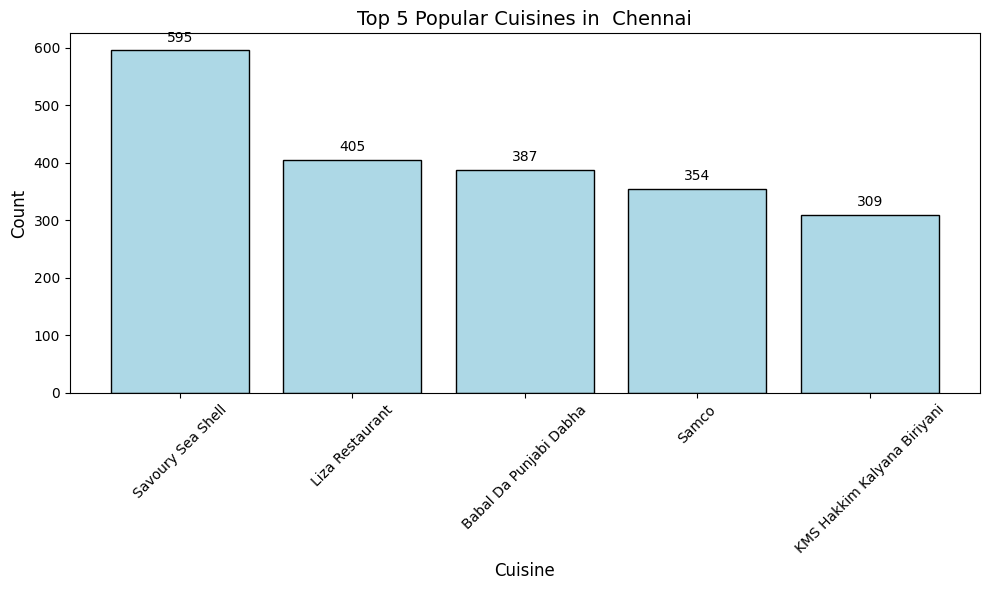

C:\Users\admin\AppData\Local\Temp\ipykernel_8616\2337534320.py:13: UserWarning:

Glyph 146 (\x92) missing from current font.

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 146 (\x92) missing from current font.



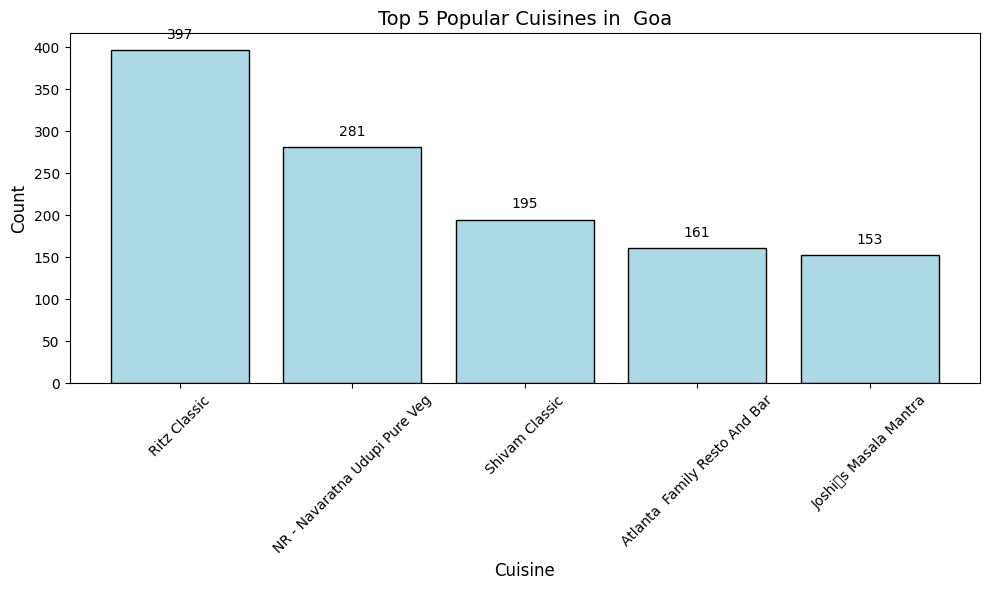

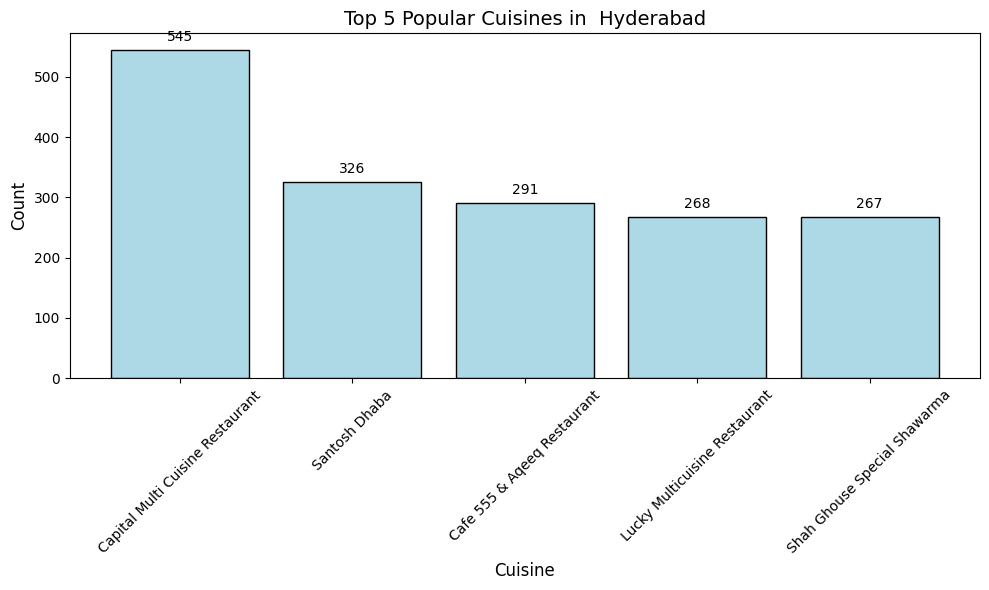

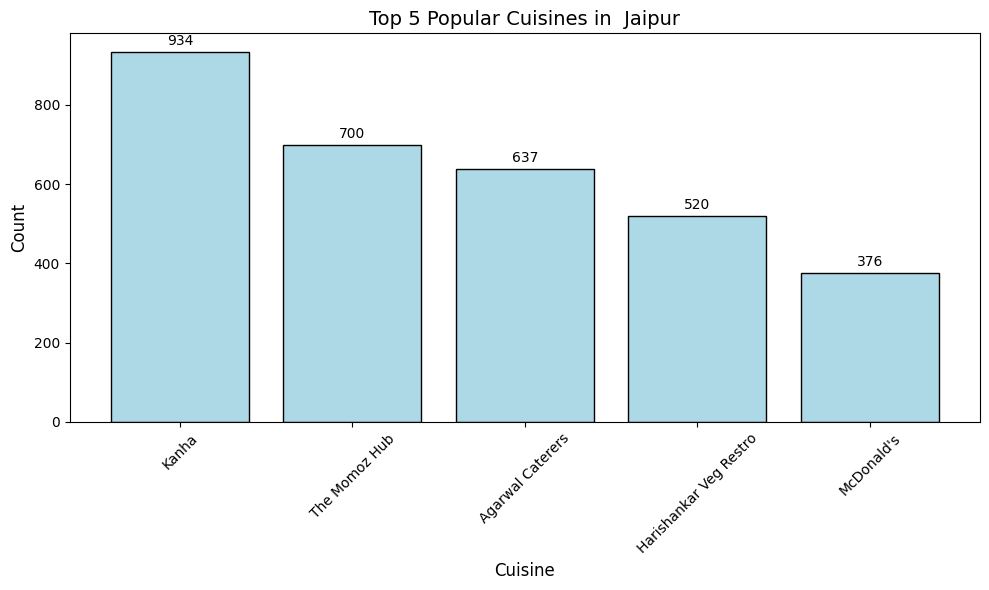

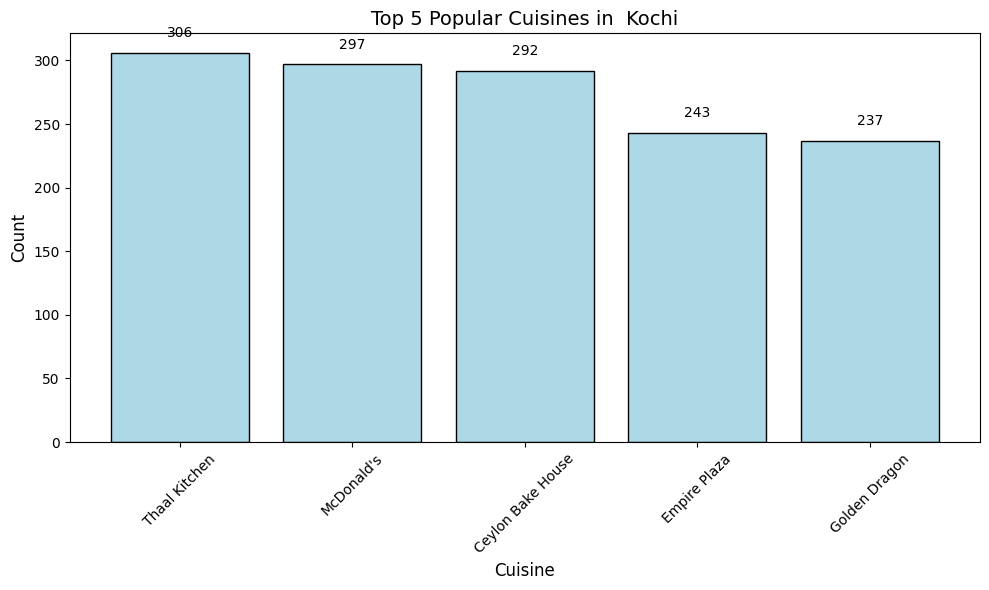

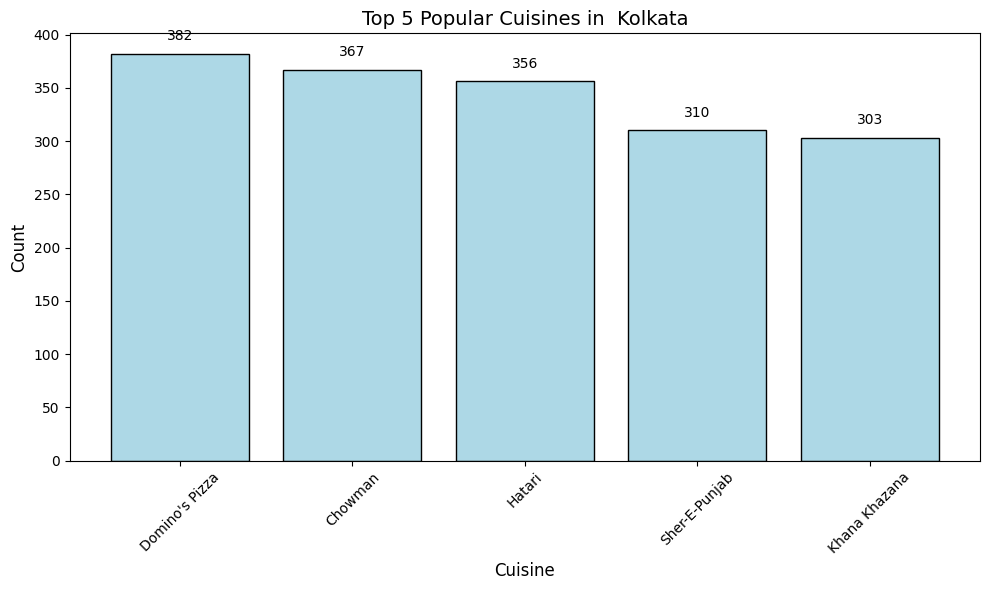

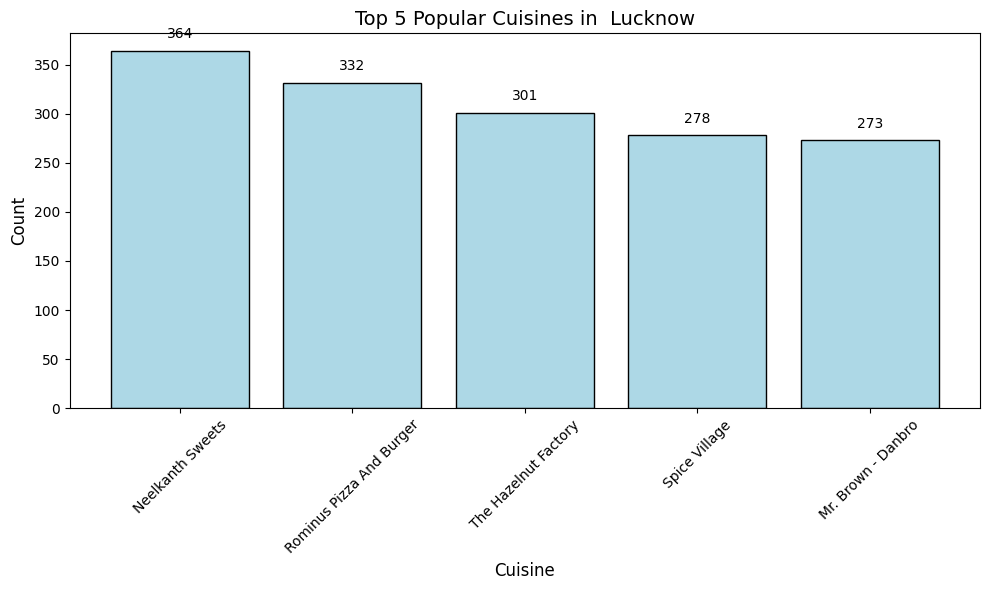

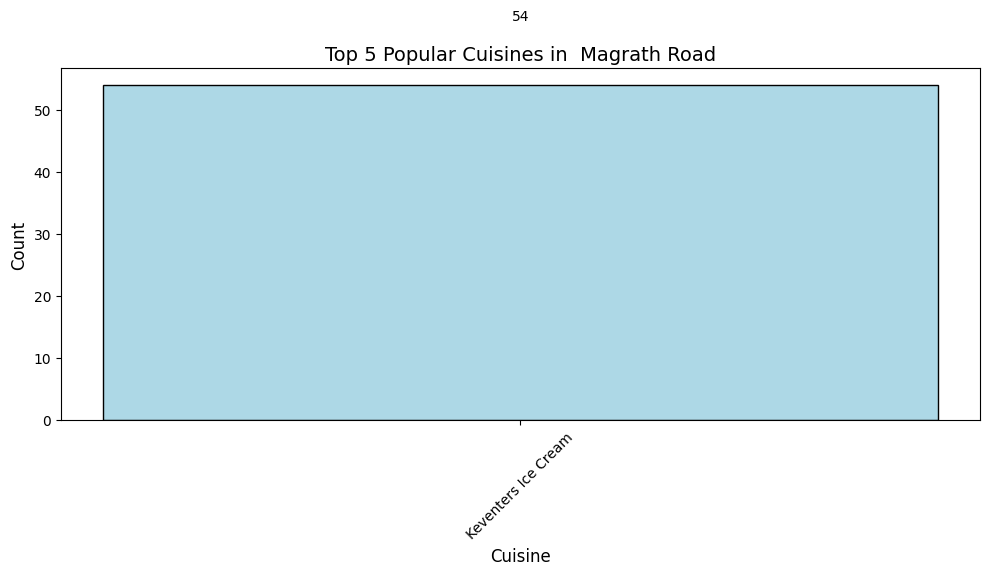

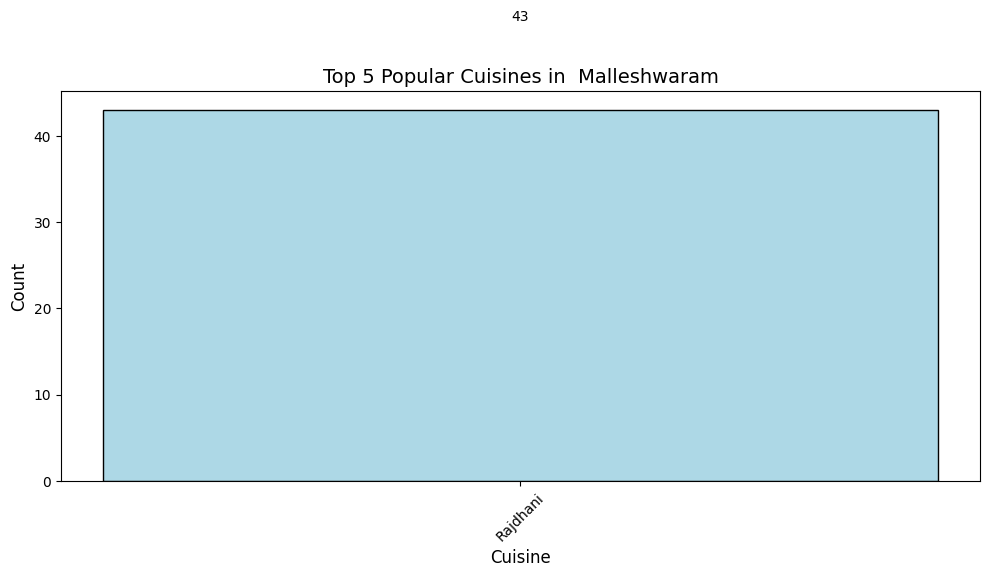

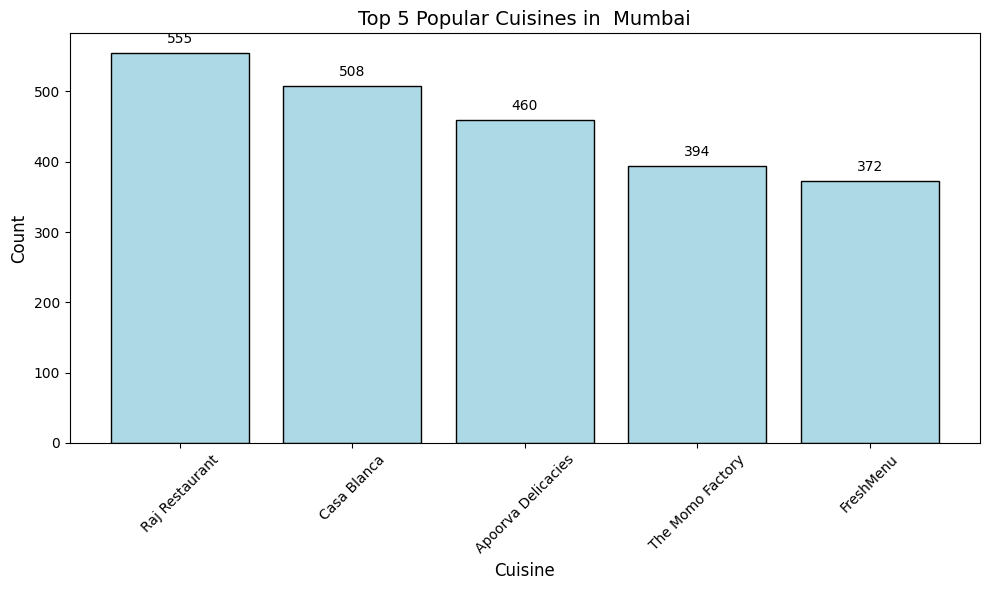

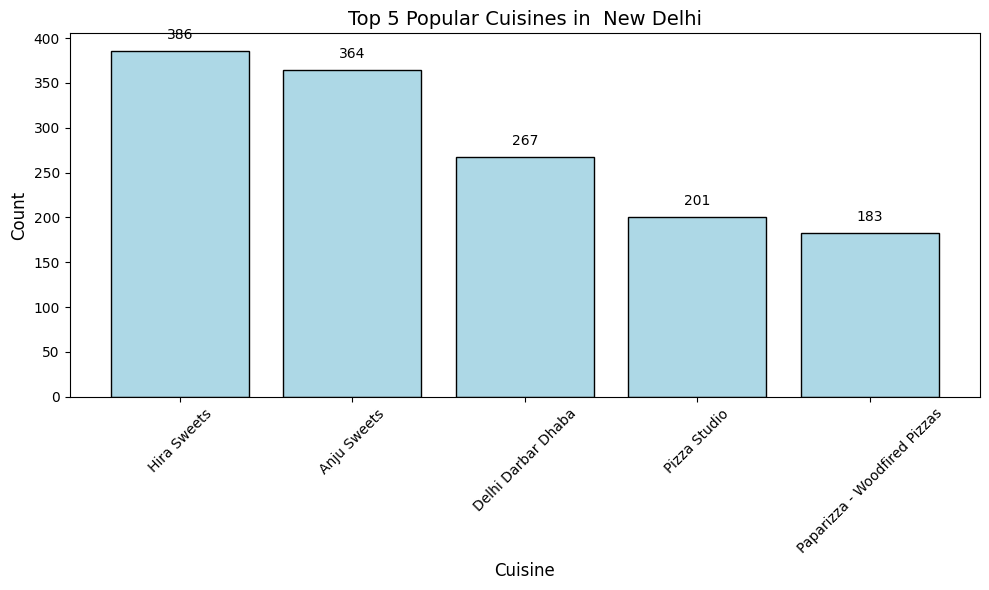

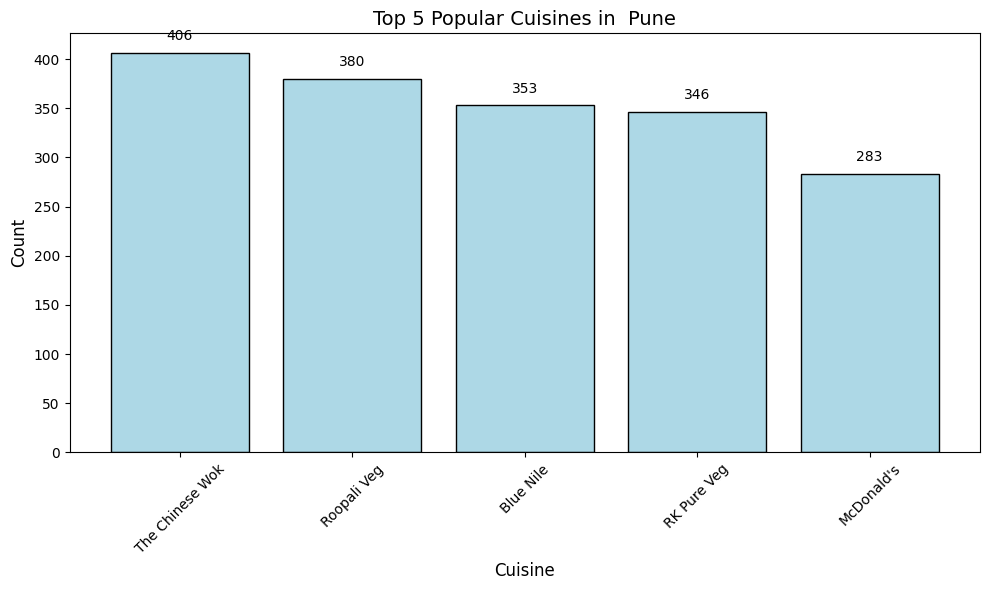

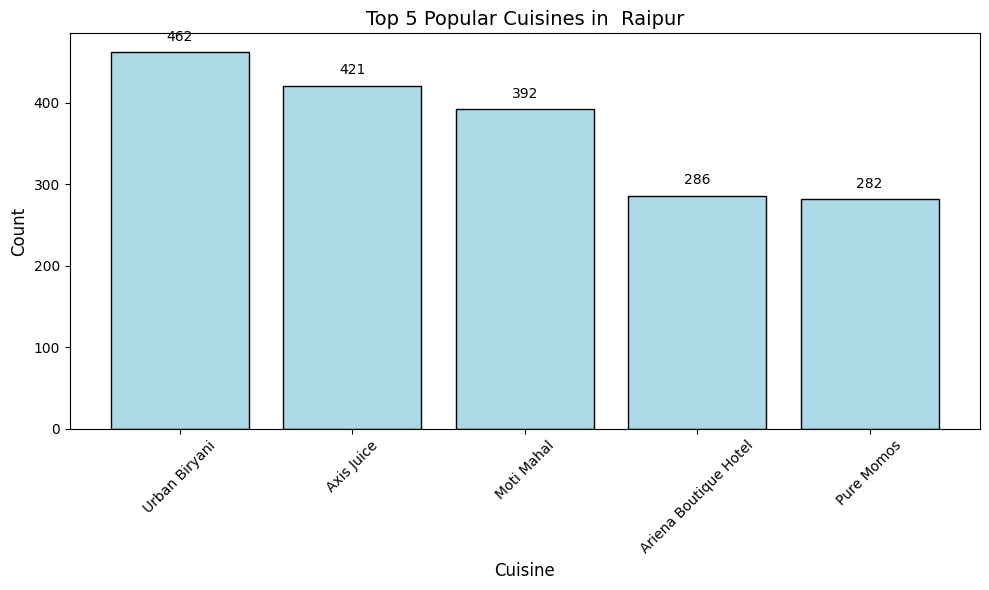

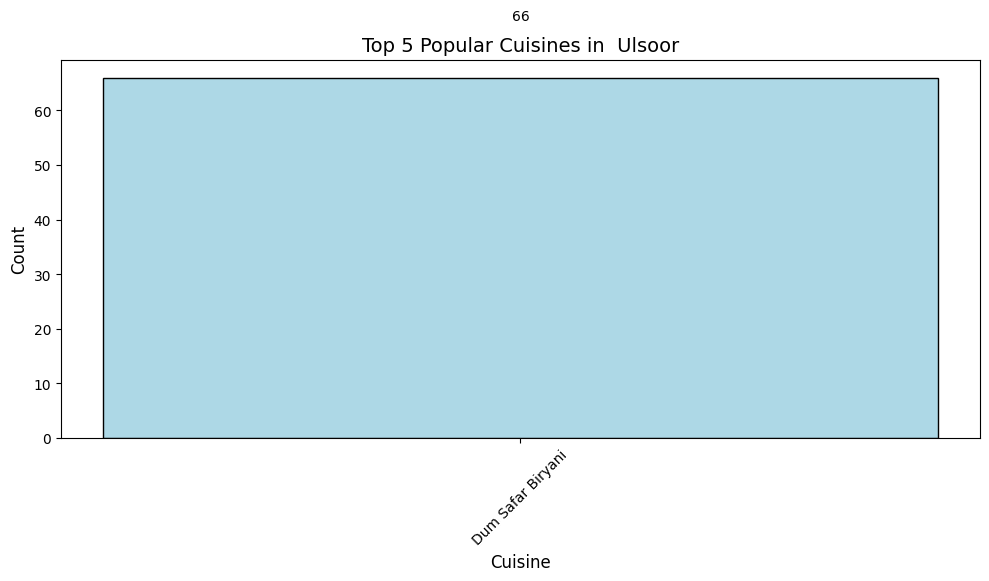

In [71]:
location_cuisine_counts = df.groupby(['City', 'Restaurant Name']).size().reset_index(name='Count')
top_cuisines_by_location = location_cuisine_counts.groupby('City').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
for location in top_cuisines_by_location['City'].unique():
    location_data = top_cuisines_by_location[top_cuisines_by_location['City'] == location]
    plt.figure(figsize=(10, 6))
    plt.bar(location_data['Restaurant Name'], location_data['Count'], color='lightblue', edgecolor='black')
    plt.xlabel('Cuisine', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Top 5 Popular Cuisines in {location}', fontsize=14)
    plt.xticks(rotation=45)
    for i, v in enumerate(location_data['Count']):
        plt.text(i, v+10, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

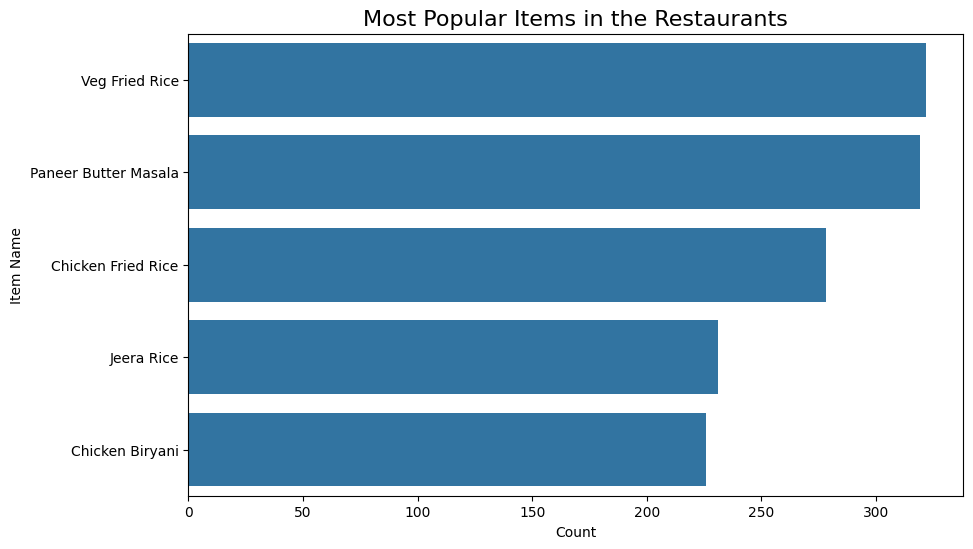

In [12]:
popular_items = df['Item Name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_items.values, y=popular_items.index)
plt.title('Most Popular Items in the Restaurants',fontsize=16)
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.show()

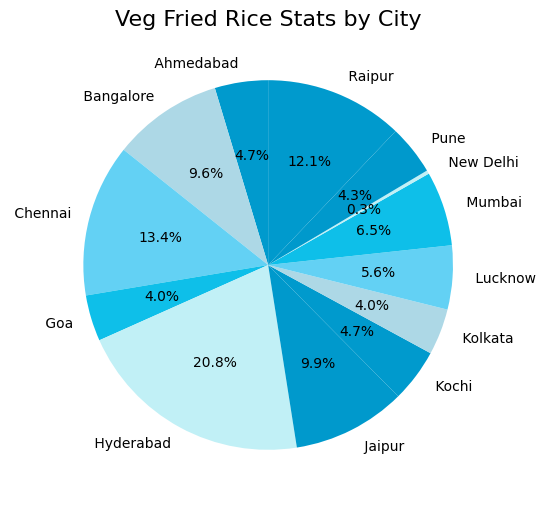

In [75]:
vfr = df['Item Name']=='Veg Fried Rice'
cols = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
Fried_rice_stats = df[vfr].groupby('City')['Item Name'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Fried_rice_stats.values, labels = Fried_rice_stats.index.levels[0], colors = cols, startangle = 90,autopct='%1.1f%%')
plt.title('Veg Fried Rice Stats by City',fontsize=16)
plt.show()

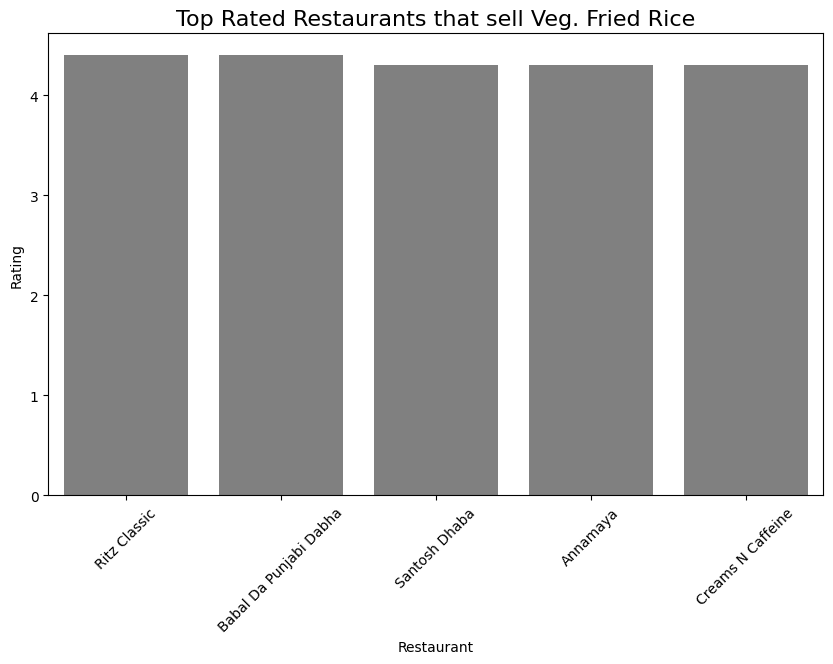

In [78]:
Fried_rice_rating = df[vfr].groupby('Restaurant Name')['Dining Rating'].mean()
Fried_rice_top = Fried_rice_rating.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(orient='v',x=Fried_rice_top.index, y=Fried_rice_top.values,color='gray')
plt.title('Top Rated Restaurants that sell Veg. Fried Rice',fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.show()

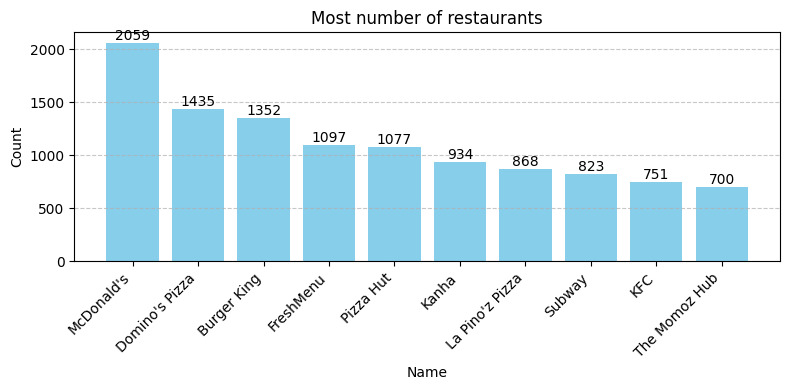

In [82]:
chains = df['Restaurant Name'].value_counts()[:10]
plt.figure(figsize=(8,4))
plt.bar(chains.index, chains, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Most number of restaurants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(chains):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

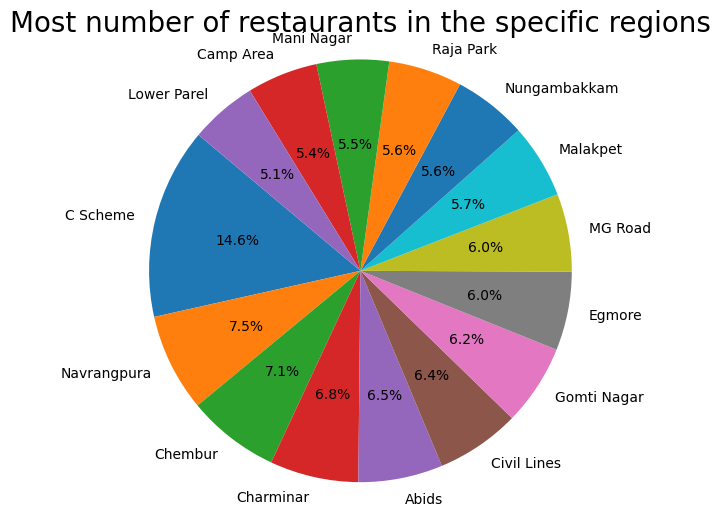

In [83]:
values = df['Place Name'].value_counts()[:15]
labels = values.index
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Most number of restaurants in the specific regions', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [33]:
items_prices_df = df[['Item Name', 'Prices']]
grouped_df = items_prices_df.groupby('Item Name')['Prices'].mean().reset_index(name='Average Price')
sorted_df = grouped_df.sort_values('Average Price', ascending=False)
top_10_df = sorted_df.head(10)
print(top_10_df)

                                               Item Name  Average Price
3600                              Bakra Massallam [8 kg]       12024.00
583                            20 Person Mutton Biriyani        6500.00
49286                             THF Golden Boat Basket        5593.22
582                           20 Person Chicken Biriyani        4900.00
278                            15 Person Mutton Biriyani        4200.00
49285                            THF Extravaganza Basket        4025.42
23577  Grand Celebration:2 Biryanis (Non Veg)+4 porti...        3999.00
29003                               Large Mutton Briyani        3790.00
23578  Grand Celebration:2 Biryanis(Veg+Non-Veg)+4 po...        3699.00
3938                   Basmathi Mutton Biriyani - 1 Padi        3640.00


C:\Users\admin\AppData\Local\Temp\ipykernel_8616\2618090956.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




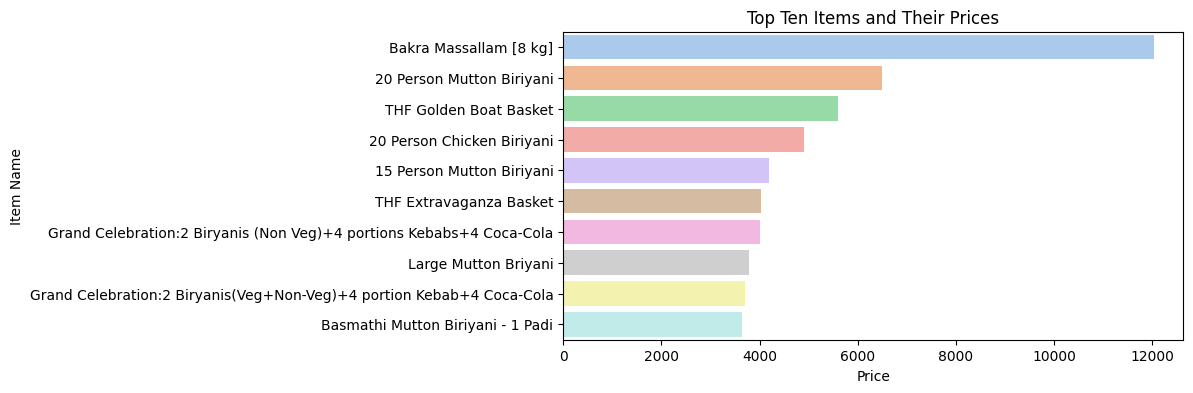

In [84]:
plt.figure(figsize=(8, 4))
colors = sns.color_palette('pastel', n_colors=len(top_10_df))
sns.barplot(x='Average Price', y='Item Name', data=top_10_df, palette=colors)
plt.title('Top Ten Items and Their Prices')
plt.xlabel('Price')
plt.ylabel('Item Name')
plt.show()

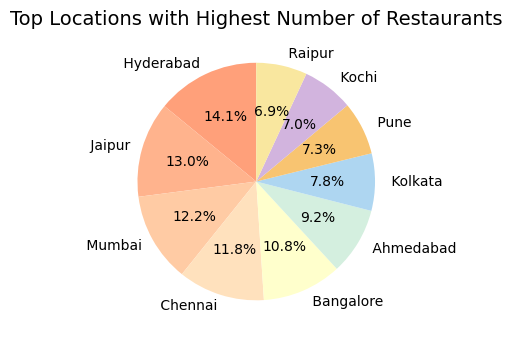

In [86]:
location_counts = df['City'].value_counts().head(10)
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']
plt.figure(figsize=(4,4))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90,colors = colors)
plt.title('Top Locations with Highest Number of Restaurants', fontsize=14)
plt.tight_layout()
plt.show()